# 1. Case Study
### 1.1 Data
- 시간과 데이터 종류가 정리된 통화량 데이터

In [3]:
import dateutil
import pandas as pd

In [5]:
df_phone = pd.read_csv("https://www.shanelynn.ie/wp-content/uploads/2015/06/phone_data.csv")
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [6]:
df_phone.dtypes
# object : String type

index             int64
date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

> string type -> date type 변경해주는 module <br>  
dateutil.parser.parse 

In [10]:
df_phone["date"] = df_phone["date"].apply(dateutil.parser.parse, dayfirst = True)
df_phone.dtypes

index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [11]:
df_phone

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


In [12]:
df_phone.groupby("month")["duration"].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

- conda install matplotlib

<AxesSubplot:xlabel='month'>

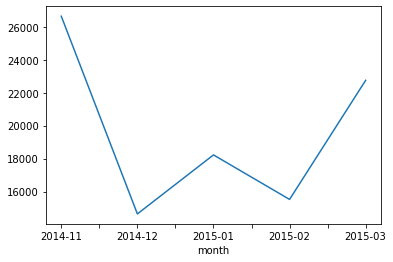

In [18]:
df_phone.groupby("month")["duration"].sum().plot()

<AxesSubplot:xlabel='month'>

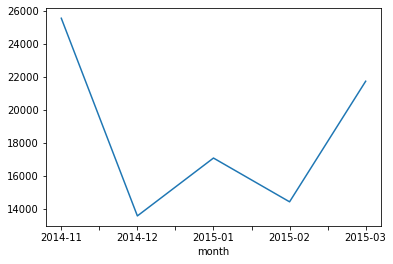

In [19]:
df_phone[df_phone["item"]=="call"].groupby("month")["duration"].sum().plot()

In [21]:
df_phone.groupby(["month","item"])["duration"].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: duration, dtype: int64

In [23]:
# Table 형태로 출력
df_phone.groupby(["month","item"])["duration"].count().unstack()

item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


<AxesSubplot:xlabel='month'>

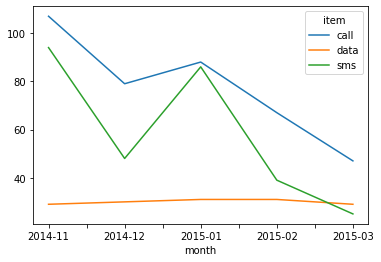

In [25]:
df_phone.groupby(["month","item"])["duration"].count().unstack().plot()

In [26]:
# month를 index로 안할 거임 : as_index = False
# duration에는 sum 적용
df_phone.groupby("month", as_index=False).agg({"duration" : "sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [27]:
df_phone.groupby("month", as_index=False).agg({"duration" : "sum"}).reset_index()

,index,month,duration
0,0,2014-11,26639.441
1,1,2014-12,14641.870
2,2,2015-01,18223.299
3,3,2015-02,15522.299
4,4,2015-03,22750.441


In [32]:
df_phone.groupby(["month", "item"]).agg({"duration" : sum, "network_type" : "count", "date" : "first"})
# first : 제일 먼저 나오는 값

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [35]:
df_phone.groupby(["month", "item"]).agg({"duration" : [min, max, sum], "network_type" : "count", "date" : [min, "first", "nunique"]})

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

In [39]:
import numpy as np
grouped = df_phone.groupby("month").agg({"duration" : [min, max, np.mean]})
grouped.columns = grouped.columns.droplevel(level=0) # level - 0 삭제
grouped

,min,max,mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [41]:
# column name change
grouped.rename(columns={"min":"min_duration","max":"max_duration","mean":"mean_duration"})

,min_duration,max_duration,mean_duration
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [43]:
grouped

,min,max,mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [42]:
# column name 앞에 붙여줌
grouped.add_prefix("duration_")

,duration_min,duration_max,duration_mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


# 2. Pivot Table & Crosstab
### 2.1 Pivot Table 
- 우리가 excel에서 보던 거
- index 축은 groupby와 동일
- column에 추가로 labeling 값을 추가해서 value에 numeric type값을 aggregation 하는 형태

In [44]:
df_phone
# 가로출 : item / 세로축 : network / 값 : duration으로 pivot 생성 가능

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


In [46]:
# duration : 값. fill_value = 0 Nan 값인 data는 0으로
df_phone.pivot_table(["duration"], 
                    index = [df_phone.month, df_phone.item],
                    columns=df_phone.network, aggfunc="sum", fill_value=0)

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

In [47]:
df_phone.groupby(["month", "item","network"])["duration"].sum().unstack()

network       Meteor   Tesco    Three  Vodafone      data  landline  special  \
month   item                                                                   
2014-11 call  1521.0  4045.0  12458.0    4316.0       NaN    2906.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms     10.0     3.0     25.0      55.0       NaN       NaN      1.0   
2014-12 call  2010.0  1819.0   6316.0    1302.0       NaN    1424.0      NaN   
        data     NaN     NaN      NaN       NaN  1032.870       NaN      NaN   
        sms     12.0     1.0     13.0      18.0       NaN       NaN      NaN   
2015-01 call  2207.0  2904.0   6445.0    3626.0       NaN    1603.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms     10.0     3.0     33.0      40.0       NaN       NaN      NaN   
2015-02 call  1188.0  4087.0   6279.0    1864.0       NaN     730.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms      1.0     2.0     11.0      23.0       NaN       NaN      2.0   
2015-03 call   274.0   973.0   4966.0    3513.0       NaN   11770.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms      NaN     4.0      5.0      13.0       NaN       NaN      NaN   

network       voicemail  world  
month   item                    
2014-11 call      301.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2014-12 call      690.0    NaN  
        data        NaN    NaN  
        sms         NaN    4.0  
2015-01 call      285.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-02 call      268.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-03 call      231.0    NaN  
        data        NaN    NaN  
        sms         NaN    3.0

### 2.2 Crosstab
- 특히 두 칼럼에 교차 빈도, 비율, 덧셈 등을 구할 때 사용
- pivot table의 특수한 형태
- User-Item Rating Matrix 등을 만들 때 사용 가능

In [ ]:
df_movie = pd.read_csv("")
df_movie.head()
# critic : 세로축 / title : 가로축 / rating : 값

In [ ]:
pd.crosstab(index=df_movie.critic, columns=df_movie.title, values=df_movie.rating, aggfunc="first").fillna(0)

In [ ]:
# 위와 동일
# 1) df_movie.pivot_table(values=["rating"], index=df_movie.critic, columns=df_movie.title, aggfunc="sum", fill_value=0)
# 2) df_movie.groupby(["critic","title"]).agg({"rating" : "first"}).unstack()

# 3. Merge & Concat
### 3.1 Merge 
- SQL에서 많이 사용하는 Merge와 같은 기능
- 두 개의 데이터를 하나로 합침

> subject_id 기준으로 Merge <br>  
pd.merge(df_a, df_b, on = "subject_id") <br>  
on : 같은 값 기준으로 합칠 때 (두 데이터의 subject_id에 같은 값이 있어야 함)

In [50]:
raw_data = {"subject_id" : ["1","2","3","4","5","7","8","9","10","11"],
            "test_score" : [51,15,15,61,16,14,15,1,61,16]
}
df_a = pd.DataFrame(raw_data, columns=["subject_id", "test_score"])
df_a

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [52]:
raw_data = {"subject_id" : ["4","5","6","7","8"],
            "first_name" : ["Billy", "Brian", "Bran", "Bryce", "Betty"],
            "last_name" : ["Bonder", "Black", "Balwner", "Brice", "Brisan"]
}
df_b = pd.DataFrame(raw_data, columns=["subject_id", "first_name","last_name"])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Brisan


In [53]:
pd.merge(df_a,df_b,on="subject_id")

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Brisan


- 두 dataframe column 이름이 다를 경우

> pd.merge(df_a, df_b, left_on = "subject_id", right_on = "subject_id) <br>  
left : df_a에 해당 / right : df_b에 해당 

In [55]:
pd.merge(df_a, df_b, left_on = "subject_id", right_on = "subject_id")

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Brisan


### 3.2 Join method
- INNER JOIN : left/right table 둘 다 subject_id에 same value가 있을 경우
- LEFT JOIN : left table 기준으로 join, 없는 값은 Nan으로 처리
- RIGHT JOIN : right table 기준으로 join, 없는 값은 Nan으로 처리
- FULL JOIN : 같은 건 join, 서로 없는 건 각자 정리

In [57]:
df_a

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [58]:
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Brisan


- 왼쪽 기준으로 join

In [60]:
# 현재 a에는 6이 없음 ! 먼저, 왼쪽에 있는 값은 모두 나옴, 겹치는 값들은 붙어서 나옴
pd.merge(df_a,df_b,on="subject_id",how="left")

,subject_id,test_score,first_name,last_name
0,1,51,NaN,NaN
1,2,15,NaN,NaN
2,3,15,NaN,NaN
3,4,61,Billy,Bonder
4,5,16,Brian,Black
5,7,14,Bryce,Brice
6,8,15,Betty,Brisan
7,9,1,NaN,NaN
8,10,61,NaN,NaN
9,11,16,NaN,NaN


- 오른쪽 기준으로 Join

In [61]:
# 현재 a에는 6이 없음 ! 먼저, 오른쪽 있는 값은 모두 나옴, 겹치는 값들은 붙어서 나옴
pd.merge(df_a,df_b,on="subject_id",how="right")

,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,6,NaN,Bran,Balwner
3,7,14.0,Bryce,Brice
4,8,15.0,Betty,Brisan


- how default : inner join

In [62]:
pd.merge(df_a,df_b,on="subject_id",how="inner")

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Brisan


- outer join : 두 테이블의 data 다 살림

In [63]:
pd.merge(df_a,df_b,on="subject_id",how="outer")

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,Billy,Bonder
4,5,16.0,Brian,Black
5,7,14.0,Bryce,Brice
6,8,15.0,Betty,Brisan
7,9,1.0,NaN,NaN
8,10,61.0,NaN,NaN
9,11,16.0,NaN,NaN


### 3.3 Index based join
- index값 기준으로 합치기

In [65]:
# 왼쪽, 오른쪽 index기준으로 합치기 => subject_id_x, subject_id_y에 각각의 subject_id 있음
pd.merge(df_a,df_b,right_index=True, left_index = True)

,subject_id_x,test_score,subject_id_y,first_name,last_name
0,1,51,4,Billy,Bonder
1,2,15,5,Brian,Black
2,3,15,6,Bran,Balwner
3,4,61,7,Bryce,Brice
4,5,16,8,Betty,Brisan


### 3.4 Concat
- 같은 형태의 데이터를 붙이는 연산작업
- 대부분 list형태로 값을 붙임
- 밑으로 데이터 붙여짐
- axis = 1 => 옆으로 붙여짐

In [78]:
raw_data = {"subject_id" : ["1","2","3","4","5"],
            "first_name" : ["Alex", "Amy", "Allen", "Alice", "Ayoung"],
            "last_name" : ["Anderson", "Ackerman", "Ali", "Aoni", "Atiches"]
}
df_a = pd.DataFrame(raw_data, columns=["subject_id", "first_name","last_name"])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [79]:
raw_data = {"subject_id" : ["4","5","6","7","8"],
            "first_name" : ["Billy", "Brian", "Bran", "Bryce", "Betty"],
            "last_name" : ["Bonder", "Black", "Balwner", "Brice", "Brisan"]
}
df_b = pd.DataFrame(raw_data, columns=["subject_id", "first_name","last_name"])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Brisan


In [80]:
df_new = pd.concat([df_a, df_b])
# Index 삭제 => drop = True
df_new.reset_index(drop=True)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Brisan


In [81]:
# concat과 같은 효과
df_a.append(df_b)

C:\Users\pknu\AppData\Local\Temp\ipykernel_7276\2525587740.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_a.append(df_b)


,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Brisan


In [82]:
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [83]:
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Brisan


In [84]:
# 옆으로 data 붙이기
df_new = pd.concat([df_a, df_b], axis=1)
# Index 삭제 => drop = True
df_new.reset_index(drop=False)

,index,subject_id,first_name,last_name,subject_id,first_name,last_name
0,0,1,Alex,Anderson,4,Billy,Bonder
1,1,2,Amy,Ackerman,5,Brian,Black
2,2,3,Allen,Ali,6,Bran,Balwner
3,3,4,Alice,Aoni,7,Bryce,Brice
4,4,5,Ayoung,Atiches,8,Betty,Brisan


### 3.5 Case

In [85]:
import os

In [ ]:
# 2014.xlsx로 끝나는 data 기져오기
files = [file_name for file_name in os.listdir("./data") if file_name.endswith("2014.xlsx")]
files

In [ ]:
# 가져온 파일 중 삭제
files.remove("파일명")

In [ ]:
# 파일 정렬
files = sorted(files)

In [ ]:
# 엑셀 파일 읽기
df_list = [pd.read_excel(os.path.join("data", df_filename)) for df_filename in files]
status = df_list[0]
status.head()

In [ ]:
sales = pd.concat(df_list[1:])
sales.head()

In [ ]:
# status와 sales 두 데이터 merge(합치기)
merge_df = pd.merge(status,sales, how="left", on="account number",)
merge_df.head()

In [ ]:
merge_df.groupby(["status", "name_y"])["quantity","ext price"].sum().reset_index().sort_values(by=["status","quantity"], ascending = False)

# 4. Persistence
### 4.1 Database connection
- Data loading시 db connection 기능 제공

> Database 연결 코드

In [ ]:
import sqlite3

conn = sqlite3.connect("http://www.dataquest.io/blog/python-pandas-databases/")
cur = conn.cursor()
cur.execute("select * from airlines limit 5;")
results = cur.fetchall()
results

> db연결 conn을 사용하여 dataframe 생성

In [ ]:
df_airplines = pd.read_sql_query("select * from airlines;", conn)
df_airports = pd.read_sql_query("select * from airports;", conn)
df_routes = pd.read_sql_query("select * from routes;", conn)

### 4.2 XLS Persistence
- Dataframe의 엑셀 추출 코드
- Xls 엔진으로 openpyxls 또는 XlsxWrite 사용
- conda install XlsxWriter

In [ ]:
writer = pd.ExcelWriter("파일명.xlsx", engine="xlsxwriter")
# 엑셀 형태로 저장
df_routes.to_excel(writer, sheet_name="Sheet1")
# 피클 형태로 저장
df_routes.to_pickle("파일명.pickle")

In [ ]:
df_routes_pickle = pd.read_pickle("파일명.pickle")
df_routes_pickle.head()

In [ ]:
df_routes_pickle.describe()